# 範例

取得 SIFT 特徵

- 轉成灰階圖片
- 需要額外安裝 OpenCV 相關套件

## 必須安裝 opencv-contrib-python 擴充函式庫

可能安裝時會遇到系統管理員權限問題

* https://stackoverflow.com/a/50087199


In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.png')

In [11]:
# 轉灰階圖片
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 建立 SIFT 物件
SIFT_detector = cv2.xfeatures2d.SIFT_create()

# 取得 SIFT 關鍵點位置
keypoints = SIFT_detector.detect(img_gray, None)

#　畫圖 + 顯示圖片
img_show = cv2.drawKeypoints(img_gray, keypoints, img)
while True:
    cv2.imshow('SIFT', img_show)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

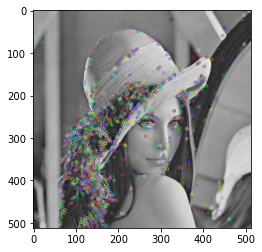

In [12]:
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

## 如何取得關鍵點座標?

Ref: https://www.itread01.com/content/1541559195.html

In [18]:
points = cv2.KeyPoint_convert(keypoints)
# print(keypoints)
print(points)

[[ 20.486685  74.56652 ]
 [ 20.486685  74.56652 ]
 [ 61.06462  496.00116 ]
 ...
 [495.1212    11.863583]
 [495.80927   79.96118 ]
 [495.80927   79.96118 ]]


## 回顧一下 SIFT 的演算法是否會考慮到顏色的變化？

In [16]:
# RGB個別圖層
img_B = img[:,:, 0]
img_G = img[:,:, 1]
img_R = img[:,:, 2]

# 取得SIFT物件
SIFT_detector = cv2.xfeatures2d.SIFT_create()

# 取得關鍵點位置
keypoints_B = SIFT_detector.detect(img_B, None)
keypoints_G = SIFT_detector.detect(img_G, None)
keypoints_R = SIFT_detector.detect(img_R, None)

# 繪製關鍵點
img_B_keyP = cv2.drawKeypoints(img_B, keypoints_B, img)
img_G_keyP = cv2.drawKeypoints(img_G, keypoints_G, img)
img_R_keyP = cv2.drawKeypoints(img_R, keypoints_R, img)

img_show = np.hstack([img_B_keyP, img_G_keyP, img_R_keyP])
while True:
    cv2.imshow('SIFT', img_show)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

In [ ]:
img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)